In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func

In [2]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine,reflect=True)

In [4]:
Base.classes.keys()

['Hawaii_m_table', 'Hawaii_s_table']

In [5]:
Measurement = Base.classes.Hawaii_m_table
Station = Base.classes.Hawaii_s_table

In [6]:
# Create a session
session = Session(engine)

# Percipitation Analysis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.DataFrame(session.query(Measurement.date,Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all())

In [9]:
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [10]:
df=df.set_index('date')
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [11]:
df.plot(y='prcp',color="blue",figsize=(10,5),label="percipitation")

In [12]:
plt.xlabel("date")
plt.ylabel("Percipitation")

Text(0,0.5,'Percipitation')

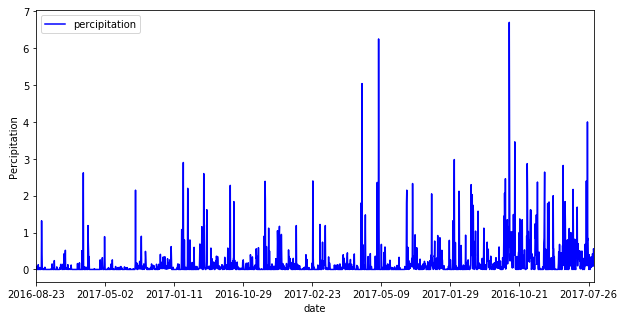

In [13]:
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
prcp    2021 non-null float64
dtypes: float64(1)
memory usage: 31.6+ KB


# Station Analysis

In [15]:
session.query(Measurement.station).distinct().count()

9

In [16]:
top_active_stations = session.query(Station.station,Station.name,func.count(Measurement.tobs)).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [17]:
top_active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [18]:
#max_station=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs)).all()

In [19]:
highest_station_observation = session.query(Station.station,Station.name,func.count(Measurement.tobs)).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

# Printing highest station observation

In [20]:
highest_station_observation

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [21]:
highest_station_observation[0]

'USC00519281'

# Query for last 12 months of temperation observation filtered by station with highest number of observations.

In [22]:
tobs_query_highest=session.query(Measurement.date,Measurement.tobs).filter(Measurement.date.between('2016-08-23', '2017-08-23')).filter(Measurement.station==highest_station_observation[0]).all()
                                                                                                                                                                                                                                  

In [23]:
len(tobs_query_highest)

352

In [24]:
df_tobs=pd.DataFrame(tobs_query_highest)

In [25]:
df_tobs.head()

,date,tobs
0,2016-08-23,77
1,2016-08-24,77
2,2016-08-25,80
3,2016-08-26,80
4,2016-08-27,75


# plotting histogram with 12 bins

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.hist(df_tobs["tobs"],bins=12,color="blue")
plt.xlabel("tobs")
plt.ylabel("Frequency")
# Create a legend for our chart
blue_patch = mpatches.Patch(color='blue',label='tobs')
plt.legend(handles=[blue_patch],loc='upper right')

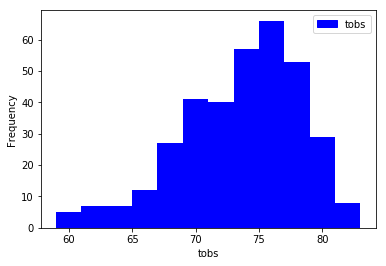

In [27]:
plt.show()

# Temperature Analysis

In [28]:
import datetime as dt
from datetime import datetime, date,time

In [29]:
## Function to calculate Avg,Min & Max
global avg_result
global min_result
global max_result
def calc_temps():
    start_date=input("Enter start date in YYYY-MM-DD:")
    year1, month1, day1 = map(int, start_date.split('-'))
    start_date = dt.date(year1, month1, day1)
    print(start_date)
    end_date=input("Enter end date in YYYY-MM-DD:")
    year2, month2, day2 = map(int, end_date.split('-'))
    end_date = dt.date(year2, month2, day2)
    print(end_date)
    #print(year1,month1,day1,year2,month2,day2)
    #x=end_date-start_date  
    #print(x)
    avg_result=session.query(func.avg(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).all()
    min_result=session.query(func.min(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).all()
    max_result=session.query(func.max(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).all()
    return(avg_result,min_result,max_result)
    

### Calling function to ask for start and end date
#calc_temps()

In [30]:
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt

Enter start date in YYYY-MM-DD:2017-01-01
2017-01-01
Enter end date in YYYY-MM-DD:2017-03-01
2017-03-01
[(69.53097345132744,)] [(80,)] [(59,)]
69.53097345132744 21


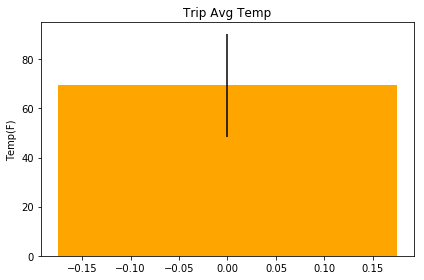

In [31]:
def main():
    avg_result, min_result, max_result=calc_temps()
    print(avg_result, max_result, min_result)
    ## x which is average temp is height of bar
    x=avg_result[0][0]
    Tmax=max_result[0][0]
    Tmin=min_result[0][0]
    peak=Tmax-Tmin
    print(x,peak)
    plt.bar(0,x,0.35,yerr=peak,color='orange')
    plt.title('Trip Avg Temp')
    plt.ylabel("Temp(F)")
    plt.tight_layout()
    plt.show()
main()

# Please follow Surfer_routes.py for Flask related excercise

In [34]:
start_date='2017-01-01'
end_date='2017-01-02'
avg_result=session.query(func.avg(Measurement.tobs)).filter(Measurement.date.between(start_date, end_date)).all()

In [35]:
avg_result

[(68.8)]